In [1]:
import json

In [176]:
data = json.loads(open('healthboards/items.json', 'r').read())

In [190]:
posts = set(map(lambda x: x['post'], data))

In [192]:
len(posts)

272553

In [9]:
json.dump(data[:1000], open('subset.json', 'w'))

In [2]:
data = json.loads(open('subset.json', 'r').read())

In [15]:
import spacy
nlp = spacy.blank('en')
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [22]:
data[10]

{'post': 'I just wanted to say Thank You to Tree Frog for all the listings on this subject. I have been reading all the sites that are listed. And have been reading them now for 4 hours. My eyes are sore. But they have helped me to understand a little bit more. I am hoping that the Synthroid helps me out. I have just recentely turned 50, and it seems that my health is starting to turn against me. So I guess it is time for me to fight back. It is going to be hard at first. I take Lipitor, Celebrex, Vit. E, and a Multivitamin. And now it seems that I have to change the times I take this stuff. Oh well. I guess I will learn.\nSorry this is so long. Again THANKS Tree Frog.\nWell, I have been hypo for 5 years now. I used to be at 317 TSH but now stay around 5 or so. I am on synthroid at a level of .350. Thanks for the internet lead. I will check it out. I am sick of this thing. Losing weight is all but impossible. Phen Phen was working great, but you know the reat of the story on that one.'

In [201]:
all_lens = np.array(list(map(lambda post: 
                np.fromiter(
                    (len([token.text for token in sent if not token.is_stop]) for sent in nlp(post).sents),
                     dtype=np.int), posts)))

In [ ]:
flat_lens = np.hstack(all_lens)

In [203]:
stat_general = {
    'min': flat_lens.min(),
    'max': flat_lens.max(),
    'mean': flat_lens.mean(),
    'std': flat_lens.std(),
}

In [278]:
all_lens_stat = np.array(list(map(
    lambda x: np.array((np.min(x), np.max(x), np.mean(x), np.std(x))),
        list(filter(lambda post: len(post)>0, 
    map(lambda post: post[post<30], all_lens))))))

In [279]:
all_lens_stat.max()

29.0

In [285]:
flat_lens = np.hstack(list(filter(lambda post: len(post)>0, 
    map(lambda post: post[post<30], all_lens))))

In [280]:
len(all_lens_stat)

271861

In [281]:
stat_per_post = dict(zip(['min', 'max', 'mean', 'std'], all_lens_stat.mean(axis=0)))

{'min': 0, 'max': 2027, 'mean': 10.932588521491454, 'std': 8.964716092053479}
{'min': 3.0906713357193567, 'max': 22.281596109776686, 'mean': 10.023516230005018, 'std': 4.887651106742273}


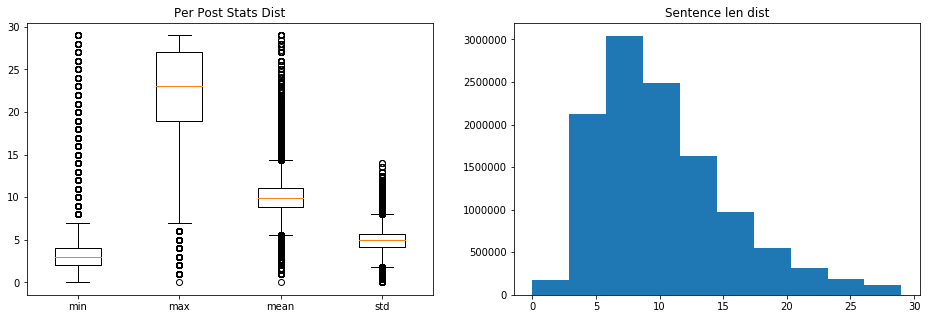

In [287]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))

ax1.set_title('Per Post Stats Dist')
ax1.boxplot(all_lens_stat, labels=['min', 'max', 'mean', 'std'])

ax2.set_title('Sentence len dist')
ax2.hist(flat_lens, bins=10)

print(stat_general)
print(stat_per_post)


In [286]:
import numpy as np
import matplotlib.pyplot as plt

def text_dataset_stat(sentences, remove_stop_words=False):
    if remove_stop_words:
        all_lens = np.array(list(map(lambda post: 
                        np.fromiter(
                            (len([token.text for token in sent if not token.is_stop]) for sent in nlp(post).sents),
                             dtype=np.int), sentences)))
    else:
        all_lens = np.array(list(map(lambda post: 
                        np.fromiter((len(sent) for sent in nlp(post['post']).sents), dtype=np.int), 
                                 sentences)))
    flat_lens = np.hstack(all_lens)
    stat_general = {
        'min': flat_lens.min(),
        'max': flat_lens.max(),
        'mean': flat_lens.mean(),
        'std': flat_lens.std(),
    }
    all_lens_stat = np.array(list(map(
        lambda x: np.array((np.min(x), np.max(x), np.mean(x), np.std(x))), all_lens)))
    stat_per_post = dict(zip(['min', 'max', 'mean', 'std'], all_lens_stat.mean(axis=0)))
    
    fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
    
    ax1.set_title('Per Post Stats Dist')
    ax1.boxplot(all_lens_stat, labels=['min', 'max', 'mean', 'std'])
    
    ax2.set_title('Sentence len dist')
    ax2.hist(flat_lens)
    
    print(stat_general)
    print(stat_per_post)
    
    #return stat_general, stat_per_post

In [ ]:
print(text_dataset_stat(posts[1:], True))